<a href="https://colab.research.google.com/github/Souvik0651/Zomato-Restaurant-Clustering-and-sentiment-Analysis/blob/main/Zomato_Restaurant_Clustering_and_sentiment_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
df=pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Capstone project4- Unsupervised/Zomato Restaurant names and Metadata.csv')

In [ ]:
df.head(2)

,Name,Links,Cost,Collections,Cuisines,Timings
0,Beyond Flavours,https://www.zomato.com/hyderabad/beyond-flavou...,800,"Food Hygiene Rated Restaurants in Hyderabad, C...","Chinese, Continental, Kebab, European, South I...","12noon to 3:30pm, 6:30pm to 11:30pm (Mon-Sun)"
1,Paradise,https://www.zomato.com/hyderabad/paradise-gach...,800,Hyderabad's Hottest,"Biryani, North Indian, Chinese",11 AM to 11 PM


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 105 entries, 0 to 104
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Name         105 non-null    object
 1   Links        105 non-null    object
 2   Cost         105 non-null    object
 3   Collections  51 non-null     object
 4   Cuisines     105 non-null    object
 5   Timings      104 non-null    object
dtypes: object(6)
memory usage: 5.0+ KB


In [ ]:
df.drop('Collections',axis=1,inplace=True)

In [ ]:
df.drop(df[df.Timings.isnull()].index,inplace=True)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 104 entries, 0 to 104
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Name      104 non-null    object
 1   Links     104 non-null    object
 2   Cost      104 non-null    object
 3   Cuisines  104 non-null    object
 4   Timings   104 non-null    object
dtypes: object(5)
memory usage: 4.9+ KB


In [ ]:
df.Name.unique()

array(['Beyond Flavours', 'Paradise', 'Flechazo',
       'Shah Ghouse Hotel & Restaurant', 'Over The Moon Brew Company',
       "The Fisherman's Wharf", 'eat.fit', 'Shah Ghouse Spl Shawarma',
       'Hyper Local', 'Cream Stone', "Sardarji's Chaats & More",
       'Barbeque Nation', 'Absolute Sizzlers',
       'The Lal Street - Bar Exchange', "AB's - Absolute Barbecues",
       'KFC', 'NorFest - The Dhaba', 'Hotel Zara Hi-Fi',
       '10 Downing Street', 'Pakwaan Grand', '13 Dhaba',
       "Jonathan's Kitchen - Holiday Inn Express & Suites", 'B-Dubs',
       'Amul', 'SKYHY', 'Tiki Shack', 'Mustang Terrace Lounge',
       "3B's - Buddies, Bar & Barbecue", 'Behrouz Biryani',
       'Hunger Maggi Point', 'Pista House', 'Marsala Food Company',
       'Club Rogue', 'Mazzo - Marriott Executive Apartments',
       'Green Bawarchi Restaurant', 'Banana Leaf Multicuisine Restaurant',
       'Kritunga Restaurant', 'The Glass Onion', 'Deli 9 Bistro',
       'Frio Bistro', 'Karachi Bakery', 'Karachi

In [ ]:
df.Links.unique()

array(['https://www.zomato.com/hyderabad/beyond-flavours-gachibowli',
       'https://www.zomato.com/hyderabad/paradise-gachibowli',
       'https://www.zomato.com/hyderabad/flechazo-gachibowli',
       'https://www.zomato.com/hyderabad/shah-ghouse-hotel-restaurant-gachibowli',
       'https://www.zomato.com/hyderabad/over-the-moon-brew-company-gachibowli',
       'https://www.zomato.com/hyderabad/the-fishermans-wharf-gachibowli',
       'https://www.zomato.com/hyderabad/eat-fit-gachibowli',
       'https://www.zomato.com/hyderabad/shah-ghouse-spl-shawarma-gachibowli',
       'https://www.zomato.com/hyderabad/hyper-local-gachibowli',
       'https://www.zomato.com/hyderabad/cream-stone-gachibowli',
       'https://www.zomato.com/hyderabad/sardarjis-chaats-more-gachibowli',
       'https://www.zomato.com/hyderabad/barbeque-nation-gachibowli',
       'https://www.zomato.com/hyderabad/absolute-sizzlers-gachibowli',
       'https://www.zomato.com/hyderabad/the-lal-street-bar-exchange-gachi

In [ ]:
df.drop('Links',axis='columns',inplace=True)

In [ ]:
df.Cost.unique()

array(['800', '1,300', '1,200', '1,500', '500', '300', '1,000', '350',
       '400', '1,600', '750', '550', '1,900', '450', '150', '1,400',
       '1,100', '600', '200', '700', '900', '1,700', '2,500', '850',
       '650', '1,800', '2,800', '1,750', '250'], dtype=object)

In [ ]:
df.Cost=df.Cost.str.replace(',','').astype('int')

In [ ]:
df.Cuisines.unique()

array(['Chinese, Continental, Kebab, European, South Indian, North Indian',
       'Biryani, North Indian, Chinese',
       'Asian, Mediterranean, North Indian, Desserts',
       'Biryani, North Indian, Chinese, Seafood, Beverages',
       'Asian, Continental, North Indian, Chinese, Mediterranean',
       'Seafood, Goan, North Indian, Continental, Asian',
       'Healthy Food, North Indian, Continental, South Indian',
       'Lebanese', 'American, Chinese, North Indian, Kebab, South Indian',
       'Ice Cream, Desserts', 'Street Food, North Indian, Fast Food',
       'Mediterranean, North Indian, Kebab, BBQ',
       'Continental, American, Chinese',
       'North Indian, Italian, Finger Food',
       'European, Mediterranean, North Indian', 'Burger, Fast Food',
       'North Indian', 'Chinese, North Indian',
       'North Indian, Chinese, Continental',
       'North Indian, Chinese, Biryani',
       'North Indian, Japanese, Italian, Salad, Sushi', 'American',
       'Continental', 'Mex

In [ ]:
df.Cuisines.value_counts()

North Indian, Chinese                                   4
North Indian                                            3
North Indian, Biryani, Chinese                          2
Fast Food                                               2
Biryani, North Indian, Chinese                          2
                                                       ..
Andhra, Biryani, Hyderabadi, North Indian               1
Biryani, South Indian, North Indian, Chinese, Andhra    1
Italian, North Indian, South Indian, Asian              1
North Indian, Fast Food                                 1
Thai, Asian, Chinese, Malaysian                         1
Name: Cuisines, Length: 91, dtype: int64

In [ ]:
cuis=df.Cuisines.str.split(', ')
cuis

0      [Chinese, Continental, Kebab, European, South ...
1                       [Biryani, North Indian, Chinese]
2         [Asian, Mediterranean, North Indian, Desserts]
3      [Biryani, North Indian, Chinese, Seafood, Beve...
4      [Asian, Continental, North Indian, Chinese, Me...
                             ...                        
100                                   [Fast Food, Salad]
101                                     [Bakery, Mithai]
102                     [North Indian, Biryani, Chinese]
103                                          [Fast Food]
104                    [Thai, Asian, Chinese, Malaysian]
Name: Cuisines, Length: 104, dtype: object

In [ ]:
cuis_dict={}
for names in cuis:
  for name in names:
    if name in cuis_dict:
      cuis_dict[name]+=1
    else:
      cuis_dict[name]=1
print(cuis_dict)
cuis_df=pd.DataFrame(cuis_dict.items(),columns=['cuisines','no of restaurants'])

{'Chinese': 43, 'Continental': 21, 'Kebab': 6, 'European': 4, 'South Indian': 8, 'North Indian': 60, 'Biryani': 16, 'Asian': 15, 'Mediterranean': 5, 'Desserts': 13, 'Seafood': 4, 'Beverages': 5, 'Goan': 1, 'Healthy Food': 1, 'Lebanese': 1, 'American': 6, 'Ice Cream': 2, 'Street Food': 2, 'Fast Food': 15, 'BBQ': 2, 'Italian': 14, 'Finger Food': 2, 'Burger': 5, 'Japanese': 2, 'Salad': 5, 'Sushi': 4, 'Mexican': 1, 'Mughlai': 6, 'Bakery': 7, 'Juices': 1, 'Arabian': 2, 'Andhra': 5, 'Hyderabadi': 4, 'Cafe': 6, 'Spanish': 1, 'Wraps': 1, 'Thai': 3, 'Indonesian': 1, 'Modern Indian': 2, 'Momos': 4, 'Pizza': 1, 'North Eastern': 1, 'Mithai': 1, 'Malaysian': 1}


In [ ]:
cuis_df.head(27)

,cuisines,no of restaurants
0,Chinese,43
1,Continental,21
2,Kebab,6
3,European,4
4,South Indian,8
5,North Indian,60
6,Biryani,16
7,Asian,15
8,Mediterranean,5
9,Desserts,13


In [ ]:
cuis_df.sort_values(by='no of restaurants',ascending=False,inplace=True)

In [ ]:
cuis_df.reset_index(drop=True)

,cuisines,no of restaurants
0,North Indian,60
1,Chinese,43
2,Continental,21
3,Biryani,16
4,Fast Food,15
5,Asian,15
6,Italian,14
7,Desserts,13
8,South Indian,8
9,Bakery,7


In [ ]:
print('Top 10 Cuisines:\n',cuis_df[0:10])

Top 10 Cuisines:
         cuisines  no of restaurants
5   North Indian                 60
0        Chinese                 43
1    Continental                 21
6        Biryani                 16
18     Fast Food                 15
7          Asian                 15
20       Italian                 14
9       Desserts                 13
4   South Indian                  8
28        Bakery                  7


Text(0.5, 1.0, 'Cuisines served by Restaurants')

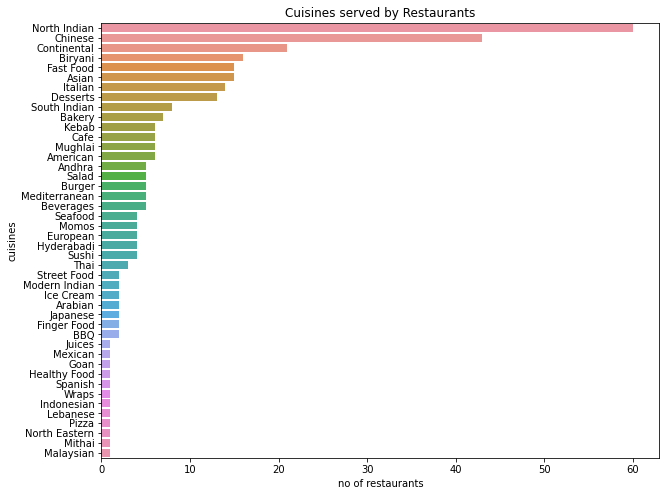

In [ ]:
plt.rcParams['figure.figsize']=(10,8)
sns.barplot(y='cuisines',x='no of restaurants',data=cuis_df)
plt.title('Cuisines served by Restaurants')

In [ ]:
df.columns

Index(['Name', 'Cost', 'Cuisines', 'Timings'], dtype='object')

In [ ]:
high_cost_rest=df[['Name','Cost']].sort_values(by='Cost',ascending=False).head(10)
low_cost_rest=df[['Name','Cost']].sort_values(by='Cost',ascending=True).head(10)
# df.groupby(['Name'])['Cost'].sum().sort_values(ascending=False)

Text(0, 0.5, 'Restaurant Name')

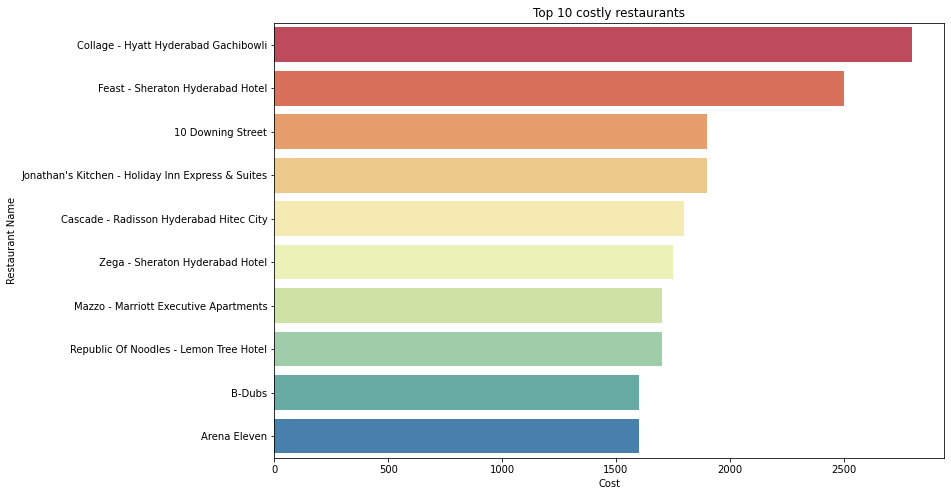

In [ ]:
plt.figure(figsize=(12,8))
sns.barplot(y='Name',x='Cost',data=high_cost_rest,palette='Spectral')
plt.title('Top 10 costly restaurants')
plt.ylabel('Restaurant Name')

Text(0, 0.5, 'Restaurant Name')

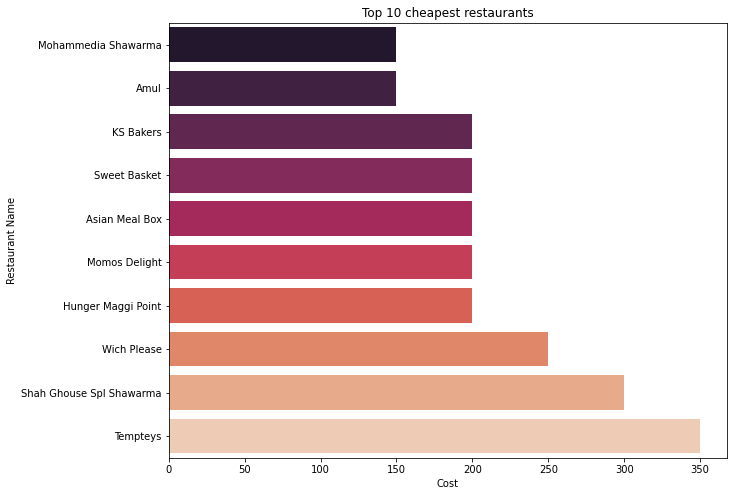

In [ ]:
sns.barplot(y='Name',x='Cost',data=low_cost_rest,palette='rocket')
plt.title('Top 10 cheapest restaurants')
plt.ylabel('Restaurant Name')

In [ ]:
df.Timings.unique()

array(['12noon to 3:30pm, 6:30pm to 11:30pm (Mon-Sun)', '11 AM to 11 PM',
       '11:30 AM to 4:30 PM, 6:30 PM to 11 PM', '12 Noon to 2 AM',
       '12noon to 11pm (Mon, Tue, Wed, Thu, Sun), 12noon to 12midnight (Fri-Sat)',
       '12Noon to 3:30PM, 4PM to 6:30PM, 7PM to 11:30PM (Mon, Tue, Wed, Thu, Sun), 12Noon to 3:30PM, 4PM to 6:30PM, 7PM to 12Midnight (Fri-Sat)',
       '7 AM to 10 PM', '12 Noon to 12 Midnight',
       '10 AM to 1 AM (Mon-Thu), 10 AM to 1:30 AM (Fri-Sun)',
       '12 Noon to 3:30 PM, 7 PM to 10:30 PM',
       '12 Noon to 3:30 PM, 6:30 PM to 11:30 PM', '11:30 AM to 1 AM',
       '12noon to 12midnight (Mon-Sun)',
       '12 Noon to 4:30 PM, 6:30 PM to 11:30 PM', '12 Noon to 10:30 PM',
       '12 Noon to 11 PM', '12:30 PM to 10 PM (Tue-Sun), Mon Closed',
       '11:30 AM to 3 PM, 7 PM to 11 PM',
       '11am to 11:30pm (Mon, Tue, Wed, Thu, Sun), 11am to 12midnight (Fri-Sat)',
       '10 AM to 5 AM',
       '12 Noon to 12 Midnight (Mon-Thu, Sun), 12 Noon to 1 AM (Fri-S

In [ ]:
df.drop('Timings',axis='columns',inplace=True)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 104 entries, 0 to 104
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Name      104 non-null    object
 1   Cost      104 non-null    int64 
 2   Cuisines  104 non-null    object
dtypes: int64(1), object(2)
memory usage: 3.2+ KB


In [ ]:
no_of_cuisines=[]
for names in cuis:
  no_of_cuisines.append(len(names))
print(no_of_cuisines)

[6, 3, 4, 5, 5, 5, 4, 1, 5, 2, 3, 4, 3, 3, 3, 2, 1, 2, 3, 3, 1, 5, 1, 2, 3, 1, 5, 3, 2, 1, 5, 3, 2, 4, 3, 5, 4, 4, 3, 4, 3, 3, 3, 4, 4, 3, 4, 3, 3, 2, 3, 3, 3, 1, 2, 4, 2, 2, 3, 4, 4, 3, 3, 2, 4, 4, 2, 3, 3, 5, 3, 2, 3, 3, 2, 1, 4, 2, 4, 3, 2, 5, 2, 4, 1, 2, 4, 2, 2, 1, 4, 5, 2, 5, 2, 3, 2, 1, 2, 2, 2, 3, 1, 4]


In [ ]:
df.columns

Index(['Name', 'Cost', 'Cuisines'], dtype='object')

In [ ]:
df['no of cuisnes']=no_of_cuisines
df.drop('Cuisines',axis='columns',inplace=True)

In [ ]:
df.head(2)

,Name,Cost,no of cuisnes
0,Beyond Flavours,800,6
1,Paradise,800,3


In [ ]:
df1=pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Capstone project4- Unsupervised/Zomato Restaurant reviews.csv')

In [ ]:
df1.head(2)

,Restaurant,Reviewer,Review,Rating,Metadata,Time,Pictures
0,Beyond Flavours,Rusha Chakraborty,"The ambience was good, food was quite good . h...",5,"1 Review , 2 Followers",5/25/2019 15:54,0
1,Beyond Flavours,Anusha Tirumalaneedi,Ambience is too good for a pleasant evening. S...,5,"3 Reviews , 2 Followers",5/25/2019 14:20,0


In [ ]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Restaurant  10000 non-null  object
 1   Reviewer    9962 non-null   object
 2   Review      9955 non-null   object
 3   Rating      9962 non-null   object
 4   Metadata    9962 non-null   object
 5   Time        9962 non-null   object
 6   Pictures    10000 non-null  int64 
dtypes: int64(1), object(6)
memory usage: 547.0+ KB


In [ ]:
df1=df1.dropna()

In [ ]:
df1.isnull().sum()

Restaurant    0
Reviewer      0
Review        0
Rating        0
Metadata      0
Time          0
Pictures      0
dtype: int64

In [ ]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9955 entries, 0 to 9999
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Restaurant  9955 non-null   object
 1   Reviewer    9955 non-null   object
 2   Review      9955 non-null   object
 3   Rating      9955 non-null   object
 4   Metadata    9955 non-null   object
 5   Time        9955 non-null   object
 6   Pictures    9955 non-null   int64 
dtypes: int64(1), object(6)
memory usage: 622.2+ KB


In [ ]:
df1.Restaurant.unique()

array(['Beyond Flavours', 'Paradise', 'Flechazo',
       'Shah Ghouse Hotel & Restaurant', 'Over The Moon Brew Company',
       "The Fisherman's Wharf", 'eat.fit', 'Shah Ghouse Spl Shawarma',
       'Hyper Local', 'Cream Stone', "Sardarji's Chaats & More",
       'Barbeque Nation', 'Absolute Sizzlers',
       'The Lal Street - Bar Exchange', "AB's - Absolute Barbecues",
       'KFC', 'NorFest - The Dhaba', 'Hotel Zara Hi-Fi',
       '10 Downing Street', 'Pakwaan Grand', '13 Dhaba',
       "Jonathan's Kitchen - Holiday Inn Express & Suites", 'B-Dubs',
       'Amul', 'SKYHY', 'Tiki Shack', 'Mustang Terrace Lounge',
       "3B's - Buddies, Bar & Barbecue", 'Behrouz Biryani',
       'Hunger Maggi Point', 'Pot Pourri', 'Pista House',
       'Marsala Food Company', 'Club Rogue',
       'Mazzo - Marriott Executive Apartments',
       'Green Bawarchi Restaurant', 'Banana Leaf Multicuisine Restaurant',
       'Kritunga Restaurant', 'The Glass Onion', 'Deli 9 Bistro',
       'Frio Bistro', 'Kara

In [ ]:
df1.columns

Index(['Restaurant', 'Reviewer', 'Review', 'Rating', 'Metadata', 'Time',
       'Pictures'],
      dtype='object')

In [ ]:
df1.Reviewer.unique()

array(['Rusha Chakraborty', 'Anusha Tirumalaneedi', 'Ashok Shekhawat',
       ..., 'Ramandeep', 'Nayana Shanbhag', 'Bhargava Krishna'],
      dtype=object)

In [ ]:
df1.Review.unique()

array(['The ambience was good, food was quite good . had Saturday lunch , which was cost effective .\nGood place for a sate brunch. One can also chill with friends and or parents.\nWaiter Soumen Das was really courteous and helpful.',
       'Ambience is too good for a pleasant evening. Service is very prompt. Food is good. Over all a good experience. Soumen Das - kudos to the service',
       'A must try.. great food great ambience. Thnx for the service by Pradeep and Subroto. My personal recommendation is Penne Alfredo Pasta:) ....... Also the music in the background is amazing.',
       ...,
       'Bad rating is mainly because of "Chicken Bone found in Veg food" and is not acceptable for a Vegetarian.\n\nTo satiate Cravings for chinese food we headed to Chinese Pavilion and there was also a voucher available in Little app for Luncheon tray for Rs 310 (Veg) [well do not bother for the voucher as the price for Veg Luncheon tray is Rs 275/- + taxes in the restaurant itself).\n\nThe am

In [ ]:
df1.Rating.unique()
df1.Rating.value_counts()

5       3826
4       2373
1       1735
3       1192
2        684
4.5       69
3.5       47
2.5       19
1.5        9
Like       1
Name: Rating, dtype: int64

In [ ]:
df1=df1.drop(df1.loc[df1.Rating=='Like'].index)

In [ ]:
df1['Rating']=df1.Rating.astype('float')

In [ ]:
Rating=df1.groupby(['Restaurant'])['Rating'].mean().sort_values(ascending=False)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: MatplotlibDeprecationWarning: Using a string of single character colors as a color sequence is deprecated. Use an explicit list instead.
  after removing the cwd from sys.path.


Text(0.5, 1.0, 'Top rating hotels')

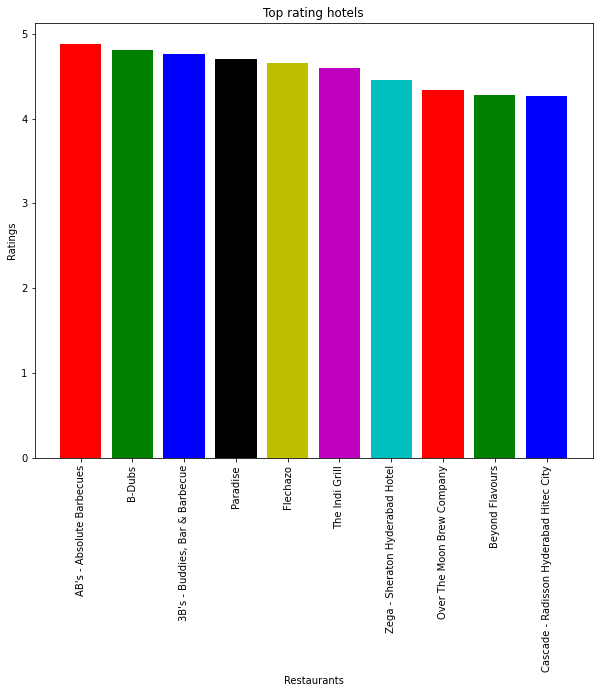

In [ ]:
top_10=Rating.iloc[:10]
x=top_10.index.to_list()
y=top_10.to_list()
plt.bar(x,y,color='rgbkymc')
plt.xticks(rotation=90)
plt.xlabel('Restaurants')
plt.ylabel('Ratings')
plt.title('Top rating hotels')

In [ ]:
top_10

Restaurant
AB's - Absolute Barbecues                  4.88
B-Dubs                                     4.81
3B's - Buddies, Bar & Barbecue             4.76
Paradise                                   4.70
Flechazo                                   4.66
The Indi Grill                             4.60
Zega - Sheraton Hyderabad Hotel            4.45
Over The Moon Brew Company                 4.34
Beyond Flavours                            4.28
Cascade - Radisson Hyderabad Hitec City    4.26
Name: Rating, dtype: float64

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: MatplotlibDeprecationWarning: Using a string of single character colors as a color sequence is deprecated. Use an explicit list instead.
  after removing the cwd from sys.path.


Text(0.5, 1.0, 'Lowest rating hotels')

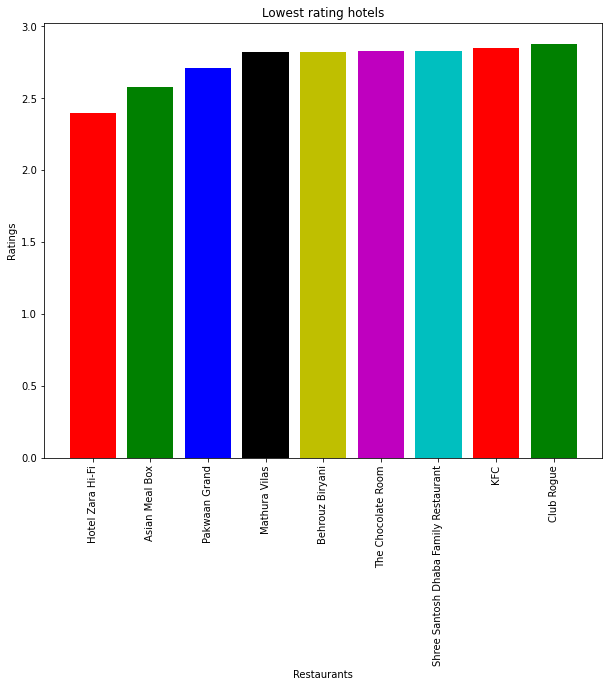

In [ ]:
bottom_10=Rating.iloc[:-10:-1]
x=bottom_10.index.to_list()
y=bottom_10.to_list()
plt.bar(x,y,color='rgbkymc')
plt.xticks(rotation=90)
plt.xlabel('Restaurants')
plt.ylabel('Ratings')
plt.title('Lowest rating hotels')

In [ ]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9954 entries, 0 to 9999
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Restaurant  9954 non-null   object 
 1   Reviewer    9954 non-null   object 
 2   Review      9954 non-null   object 
 3   Rating      9954 non-null   float64
 4   Metadata    9954 non-null   object 
 5   Time        9954 non-null   object 
 6   Pictures    9954 non-null   int64  
dtypes: float64(1), int64(1), object(5)
memory usage: 622.1+ KB


In [ ]:
df1.Metadata.unique()

array(['1 Review , 2 Followers', '3 Reviews , 2 Followers',
       '2 Reviews , 3 Followers', ..., '65 Reviews , 423 Followers',
       '13 Reviews , 144 Followers', '472 Reviews , 1302 Followers'],
      dtype=object)

In [ ]:
meta=df1.Metadata.str.split(expand=True)
meta_df=meta[[0,3]]
meta_df.columns=['Reviews','Followers']
meta_df

,Reviews,Followers
0,1,2
1,3,2
2,2,3
3,1,1
4,3,2
...,...,...
9995,53,54
9996,2,53
9997,65,423
9998,13,144


In [ ]:
df1=pd.concat([df1,meta_df],axis=1)
df1.drop('Metadata',axis=1,inplace=True)
df1.head()

,Restaurant,Reviewer,Review,Rating,Time,Pictures,Reviews,Followers
0,Beyond Flavours,Rusha Chakraborty,"The ambience was good, food was quite good . h...",5.0,5/25/2019 15:54,0,1,2
1,Beyond Flavours,Anusha Tirumalaneedi,Ambience is too good for a pleasant evening. S...,5.0,5/25/2019 14:20,0,3,2
2,Beyond Flavours,Ashok Shekhawat,A must try.. great food great ambience. Thnx f...,5.0,5/24/2019 22:54,0,2,3
3,Beyond Flavours,Swapnil Sarkar,Soumen das and Arun was a great guy. Only beca...,5.0,5/24/2019 22:11,0,1,1
4,Beyond Flavours,Dileep,Food is good.we ordered Kodi drumsticks and ba...,5.0,5/24/2019 21:37,0,3,2


In [ ]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9954 entries, 0 to 9999
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Restaurant  9954 non-null   object 
 1   Reviewer    9954 non-null   object 
 2   Review      9954 non-null   object 
 3   Rating      9954 non-null   float64
 4   Time        9954 non-null   object 
 5   Pictures    9954 non-null   int64  
 6   Reviews     9954 non-null   object 
 7   Followers   8380 non-null   object 
dtypes: float64(1), int64(1), object(6)
memory usage: 699.9+ KB


In [ ]:
df1=df1.fillna(0)

In [ ]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9954 entries, 0 to 9999
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Restaurant  9954 non-null   object 
 1   Reviewer    9954 non-null   object 
 2   Review      9954 non-null   object 
 3   Rating      9954 non-null   float64
 4   Time        9954 non-null   object 
 5   Pictures    9954 non-null   int64  
 6   Reviews     9954 non-null   object 
 7   Followers   9954 non-null   object 
dtypes: float64(1), int64(1), object(6)
memory usage: 699.9+ KB


In [ ]:
df1['Reviews']=df1.Reviews.astype('int')
df1.Followers=df1.Followers.astype('int')

In [ ]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9954 entries, 0 to 9999
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Restaurant  9954 non-null   object 
 1   Reviewer    9954 non-null   object 
 2   Review      9954 non-null   object 
 3   Rating      9954 non-null   float64
 4   Time        9954 non-null   object 
 5   Pictures    9954 non-null   int64  
 6   Reviews     9954 non-null   int64  
 7   Followers   9954 non-null   int64  
dtypes: float64(1), int64(3), object(4)
memory usage: 699.9+ KB


In [ ]:
df1.drop('Time',axis=1,inplace=True)

In [ ]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9954 entries, 0 to 9999
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Restaurant  9954 non-null   object 
 1   Reviewer    9954 non-null   object 
 2   Review      9954 non-null   object 
 3   Rating      9954 non-null   float64
 4   Pictures    9954 non-null   int64  
 5   Reviews     9954 non-null   int64  
 6   Followers   9954 non-null   int64  
dtypes: float64(1), int64(3), object(3)
memory usage: 622.1+ KB


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 104 entries, 0 to 104
Data columns (total 3 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Name           104 non-null    object
 1   Cost           104 non-null    int64 
 2   no of cuisnes  104 non-null    int64 
dtypes: int64(2), object(1)
memory usage: 3.2+ KB


In [ ]:
avg_rating=df1.groupby(['Restaurant'])['Rating'].mean().reset_index()
avg_rating.rename(columns={'Restaurant':'Name'},inplace=True)
avg_rating.sort_values(by='Rating',ascending = False).head()

,Name,Rating
3,AB's - Absolute Barbecues,4.88
11,B-Dubs,4.81
2,"3B's - Buddies, Bar & Barbecue",4.76
67,Paradise,4.70
35,Flechazo,4.66


In [ ]:
avg_rating

,Name,Rating
0,10 Downing Street,3.80
1,13 Dhaba,3.48
2,"3B's - Buddies, Bar & Barbecue",4.76
3,AB's - Absolute Barbecues,4.88
4,Absolute Sizzlers,3.62
...,...,...
95,Urban Asia - Kitchen & Bar,3.65
96,Yum Yum Tree - The Arabian Food Court,3.56
97,Zega - Sheraton Hyderabad Hotel,4.45
98,Zing's Northeast Kitchen,3.65


In [ ]:
rest_rating=df.merge(avg_rating,on="Name",how='left')

In [ ]:
rest_rating.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 104 entries, 0 to 103
Data columns (total 4 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Name           104 non-null    object 
 1   Cost           104 non-null    int64  
 2   no of cuisnes  104 non-null    int64  
 3   Rating         99 non-null     float64
dtypes: float64(1), int64(2), object(1)
memory usage: 4.1+ KB


In [ ]:
rest_rating=rest_rating.fillna(0)

In [ ]:
rest_rating.columns

Index(['Name', 'Cost', 'no of cuisnes', 'Rating'], dtype='object')

In [ ]:
#importing minmax scaler
from sklearn.preprocessing import MinMaxScaler

In [ ]:
col=['Cost', 'no of cuisnes', 'Rating']
scaler=MinMaxScaler()
scaled_df=scaler.fit_transform(rest_rating[col])
scaled_df=pd.DataFrame(scaled_df,columns=col)

In [ ]:
scaled_df

,Cost,no of cuisnes,Rating
0,0.245283,1.0,0.877049
1,0.245283,0.4,0.963115
2,0.433962,0.6,0.954918
3,0.245283,0.8,0.657787
4,0.396226,0.8,0.889344
...,...,...,...
99,0.169811,0.2,0.000000
100,0.018868,0.2,0.000000
101,0.132075,0.4,0.000000
102,0.037736,0.0,0.000000
